# House price prediction

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,5)

In [2]:
#load the data sets
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Exploratory Data Analysis

In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# Feature Engineering

column - area_type

In [8]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

column - availability

In [10]:
df.groupby("availability")["availability"].agg("count").sort_values(ascending = False)

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
16-Nov               1
16-Jul               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [11]:
unique_avalabilities = df["availability"].unique()

In [12]:
unique_avalabilities.shape

(81,)

column - location

In [13]:
# count of locations
df.groupby("location")["location"].agg("count").sort_values(ascending=False)

location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64

In [14]:
# if the count of a location is less than 40 it assign to new category "other_location"
result = df.groupby("location")["location"].agg("count")
mask = result < 40

def replace_location(x):
    return 'other_location' if pd.isna(x) or mask.loc[x] else x

df['location'] = df['location'].apply(replace_location)


In [15]:
unique_locations = df['location'].unique()

In [16]:
unique_locations.shape

(78,)

column -  size

In [17]:
df["size"] = df["size"].str.split(" ")

In [18]:
# change the data type of "size" column and extract numerical part of it
df["size"] = df["size"].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 2 else x).astype(float)

#df["size"] = df["size"].str.extract('(\d+)').astype(float)

In [19]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,other_location,4.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,other_location,3.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200,2.0,1.0,51.00


column - society

In [20]:
df.groupby("society")["society"].agg("count").sort_values(ascending = False)

society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
BhisePa     1
Bhiya N     1
PrpiaSr     1
Bhmesa      1
Elley B     1
Name: society, Length: 2688, dtype: int64

In [21]:
# if the count of a society is less than 20 it assign to new category "other_location"
result = df.groupby("society")["society"].agg("count")
mask = result < 20

def replace_location(x):
    return 'other_society' if pd.isna(x) or mask.loc[x] else x

df['society'] = df['society'].apply(replace_location)

In [22]:
unique_society = df['society'].unique()

In [23]:
unique_society

array(['other_society', 'Soiewre', 'Brway G', 'Prityel', 'GrrvaGr',
       'Soitya ', 'Bhe 2ko', 'Itelaa ', 'ViistLa', 'PrarePa', 'Dieldli',
       'Soazak ', 'Rosha I', 'RothaVa', 'Dhalsh ', 'SNnia E', 'Bhmesy ',
       'IBityin', 'Sryalan', 'GMown E', 'Prarkun', 'AsastDe', 'Brnia G',
       'PrityTr', 'SunceEs', 'Sodgere', 'DLhtsen', 'JRrnauv', 'PhestOn',
       'Prtanha', 'Eladero', 'Prlla C', 'PualeSk', 'GoAirej', 'Prrtht ',
       'SNity S', 'Prtates', 'MenueNo', 'PuandHi', 'Shitt S', 'Adeatlm',
       'Prncyrn', 'DLhtsan', 'SoechHa', 'Raard B', 'RInceeg', 'DLhtsnd',
       'Aklia R', 'Shthi S', 'Puachal', 'Soresea'], dtype=object)

In [24]:
unique_society.shape

(51,)

column - total_sqft

In [26]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
#some raws consist values as a range, convert this into a average value
def convert_avg(x):
    
    value = x.split(" - ")
    if len(value) == 2:
        return (float(value[0]) + float(value[1]))/2
    else:
        return x

In [28]:
df["total_sqft"] = df["total_sqft"].apply(convert_avg)

In [29]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [30]:
len(df[~df["total_sqft"].apply(is_float)])

46

In [31]:
df[~df["total_sqft"].apply(is_float)].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
410,Super built-up Area,Ready To Move,Kengeri,1.0,other_society,34.46Sq. Meter,1.0,0.0,18.5
648,Built-up Area,Ready To Move,other_location,9.0,other_society,4125Perch,9.0,NaN,265.0
775,Built-up Area,Ready To Move,other_location,1.0,other_society,1000Sq. Meter,2.0,1.0,93.0
872,Super built-up Area,Ready To Move,other_location,2.0,other_society,1100Sq. Yards,2.0,NaN,45.0
1019,Plot Area,18-Mar,other_location,1.0,other_society,5.31Acres,1.0,0.0,110.0


In [32]:
df = df.drop(df[~df["total_sqft"].apply(is_float)].index)

In [33]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,other_society,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,other_location,4.0,other_society,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,other_society,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,other_location,3.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,other_society,1200,2.0,1.0,51.00


column - price_per_sqft

In [34]:
#create a new feature price per square feet
df["price_per_sqft"] = df["price"]/ df["total_sqft"].astype(float)

In [35]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,other_society,1056,2.0,1.0,39.07,0.036998
1,Plot Area,Ready To Move,other_location,4.0,other_society,2600,5.0,3.0,120.00,0.046154
2,Built-up Area,Ready To Move,Uttarahalli,3.0,other_society,1440,2.0,3.0,62.00,0.043056
3,Super built-up Area,Ready To Move,other_location,3.0,Soiewre,1521,3.0,1.0,95.00,0.062459
4,Super built-up Area,Ready To Move,Kothanur,2.0,other_society,1200,2.0,1.0,51.00,0.042500


# Data Cleaning

In [36]:
df.isnull().sum()

area_type           0
availability        0
location            0
size               16
society             0
total_sqft          0
bath               73
balcony           605
price               0
price_per_sqft      0
dtype: int64

column - size

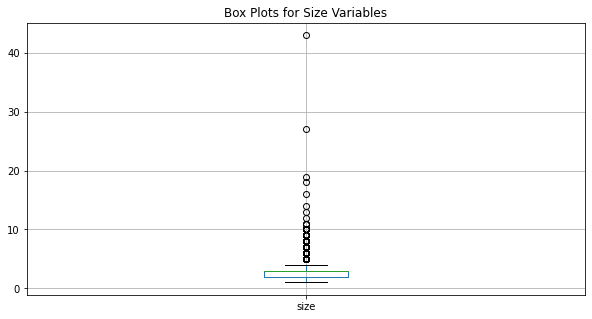

In [37]:
columns_to_plot = ["size"]
plt.figure(figsize=(10, 5))
df[columns_to_plot].boxplot()
plt.title("Box Plots for Size Variables")
plt.show()

In [39]:
# Remove outliers for multiple columns
def remove_outliers(df, columns_to_filter):
    for column_name in columns_to_filter:
        mean_value = df[column_name].mean()
        std_value = df[column_name].std()
        upper_limit = mean_value + 2 * std_value
        lower_limit = mean_value - 2 * std_value

        df = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)]

    return df

In [40]:
# List of columns to remove outliers from
columns_to_filter = ["size"]

# Apply the function for each column
df = remove_outliers(df, columns_to_filter)

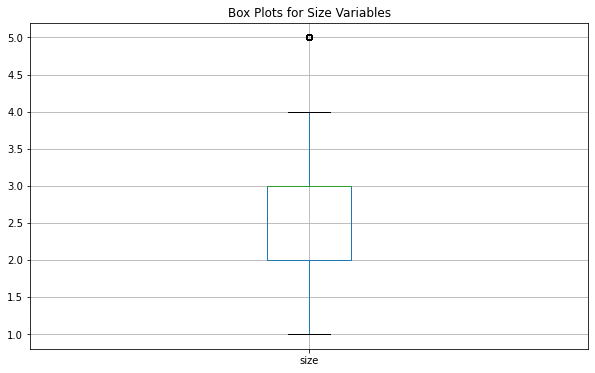

In [41]:
columns_to_plot = ["size"]
plt.figure(figsize=(10, 6))
df[columns_to_plot].boxplot()
plt.title("Box Plots for Size Variables")
plt.show()

column - bath

In [42]:
#remove data if the #of baths greater than #of beds + 2
df = df[~(df["bath"] > df["size"] + 2)]

In [43]:
df.total_sqft = df.total_sqft.astype(float)
df = df[~(df["total_sqft"]/ df["size"] < 300)]

In [45]:
df.isnull().sum()

area_type           0
availability        0
location            0
size                0
society             0
total_sqft          0
bath               57
balcony           461
price               0
price_per_sqft      0
dtype: int64

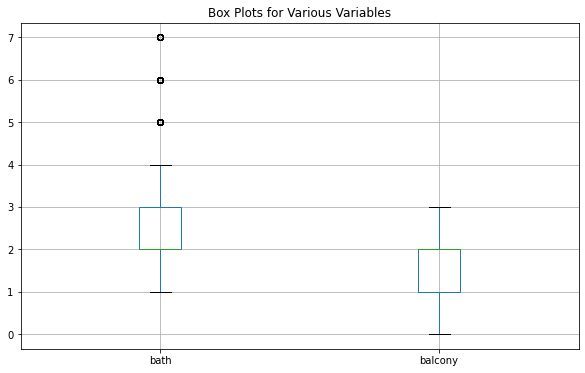

In [46]:
columns_to_plot = ["bath", "balcony"]
plt.figure(figsize=(10, 6))
df[columns_to_plot].boxplot()
plt.title("Box Plots for Various Variables")
plt.show()

In [47]:
# List of columns to fill with median
columns_to_fill_median = ["bath", "balcony"]

# Fill null values with the median of each column
df[columns_to_fill_median] = df[columns_to_fill_median].apply(lambda x: x.fillna(x.median()))

# Verify that null values are filled
df.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath              0
balcony           0
price             0
price_per_sqft    0
dtype: int64

In [48]:
#dimensions of df after dat cleaning 
df.shape

(12325, 10)

In [49]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,other_society,1056.0,2.0,1.0,39.07,0.036998
1,Plot Area,Ready To Move,other_location,4.0,other_society,2600.0,5.0,3.0,120.00,0.046154
2,Built-up Area,Ready To Move,Uttarahalli,3.0,other_society,1440.0,2.0,3.0,62.00,0.043056
3,Super built-up Area,Ready To Move,other_location,3.0,Soiewre,1521.0,3.0,1.0,95.00,0.062459
4,Super built-up Area,Ready To Move,Kothanur,2.0,other_society,1200.0,2.0,1.0,51.00,0.042500


In [50]:
#get dummy variables for "area_type" column
area_dummies = pd.get_dummies(df["area_type"])

In [51]:
area_dummies.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [52]:
#get dummy variables for "location" column
location_dummies = pd.get_dummies(df["location"])

In [53]:
location_dummies.head()

,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,Attibele,Balagere,Banashankari,Bannerghatta Road,Begur Road,Bellandur,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other_location
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#get dummy variables for "society" column
society_dummies = pd.get_dummies(df["society"])

In [55]:
society_dummies.head()

,Adeatlm,Aklia R,AsastDe,Bhe 2ko,Bhmesy,Brnia G,Brway G,DLhtsan,DLhtsen,DLhtsnd,...,Soazak,Sodgere,SoechHa,Soiewre,Soitya,Soresea,Sryalan,SunceEs,ViistLa,other_society
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
#concatanate df with area_type dummy variables
df = pd.concat([df, area_dummies], axis = 'columns')

In [57]:
#concatanate df with location dummy variables
df = pd.concat([df, location_dummies], axis = 'columns')

In [58]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other_location
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,other_society,1056.0,2.0,1.0,39.07,0.036998,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Ready To Move,other_location,4.0,other_society,2600.0,5.0,3.0,120.00,0.046154,...,0,0,0,0,0,0,0,0,0,1


In [59]:
#concatanate df with society dummy variables
df = pd.concat([df, society_dummies], axis = 'columns')

In [60]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft,...,Soazak,Sodgere,SoechHa,Soiewre,Soitya,Soresea,Sryalan,SunceEs,ViistLa,other_society
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,other_society,1056.0,2.0,1.0,39.07,0.036998,...,0,0,0,0,0,0,0,0,0,1
1,Plot Area,Ready To Move,other_location,4.0,other_society,2600.0,5.0,3.0,120.00,0.046154,...,0,0,0,0,0,0,0,0,0,1


Dependent and independent variables

In [61]:
y = df["price"]
y.head(5)

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [62]:
input_var = df.drop(["price", "area_type", "availability","location", "society"], axis = 'columns')

In [63]:
input_var.head()

,size,total_sqft,bath,balcony,price_per_sqft,Built-up Area,Carpet Area,Plot Area,Super built-up Area,7th Phase JP Nagar,...,Soazak,Sodgere,SoechHa,Soiewre,Soitya,Soresea,Sryalan,SunceEs,ViistLa,other_society
0,2.0,1056.0,2.0,1.0,0.036998,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,4.0,2600.0,5.0,3.0,0.046154,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3.0,1440.0,2.0,3.0,0.043056,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,1521.0,3.0,1.0,0.062459,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1200.0,2.0,1.0,0.042500,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


Split dataset into train and test sets

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_var, y, test_size = 0.2, random_state = 10)

Model training

In [65]:
#Linear regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.2989214419284474

In [66]:
#cros validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), input_var, y, cv = cv)

array([0.61186192, 0.76464999, 0.57469158, 0.54852137, 0.73602273])

In [67]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [68]:
#find best model using gridsearchcv
def get_best_model(input_var, y):
    
    algos = {
        "linear_regression" : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'Lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }    
    }
    
    score = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(input_var, y)
        score.append({
            'model' : algo_name,
            'best_score': gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(score, columns = ['model', 'best_score', 'best_params'])

In [69]:
get_best_model(input_var, y)

C:\Users\mahela\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\mahela\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model

,model,best_score,best_params
0,linear_regression,0.647150,{'normalize': False}
1,Lasso,0.654860,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.943081,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


model	best_score	best_params
0	linear_regression :	0.647150	{'normalize': False}
1	Lasso :	0.654860	{'alpha': 1, 'selection': 'cyclic'}
2	decision_tree :	0.943081	{'criterion': 'friedman_mse', 'splitter': 'best'}